In [5]:
# from importlib import reload

import pandas as pd
import xarray as xr
xr.set_options(keep_attrs=True,
               display_expand_data=False)

from data import get_factor_data
from dates import format_date
from chart import format_corr_matrix, px_write

from market_feedback import  draw_market_feedback_scatter, draw_market_feedback_scatter_set

In [6]:
# halflifes = [21, 63, 126, 252]
factor_data = get_factor_data(factor_set='read') #, check=is_data_stale)

c:\Users\bkrai\Source\venv-bklm\Lib\site-packages\zarr\codecs\vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)
c:\Users\bkrai\Source\venv-bklm\Lib\site-packages\zarr\codecs\vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)


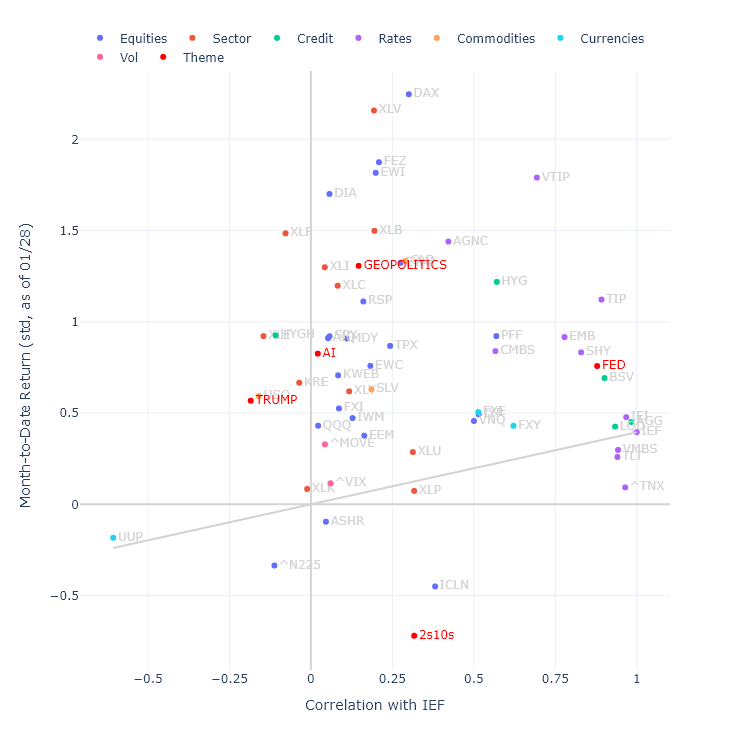

In [8]:
return_start = '2024-12-31'
return_end = '2025-01-28'
return_title = f'Month-to-Date Return (std, as of {format_date(return_end)})'

# return_start = '2025-01-21'
# return_end = '2025-01-28'
# return_title = f'5-day Return (std, {format_date(return_start)} - {format_date(return_end)})'

vol_type = 63
corr_type = 63
corr_asset = 'IEF'

fig = draw_market_feedback_scatter(factor_data, return_start, return_end, vol_type, corr_type, corr_asset, return_title)
fig.show(renderer='png')
# px_write(fig, 'fed_feedback.html')
# px_write(fig, 'fed_feedback.png')


# Loop through market feedback

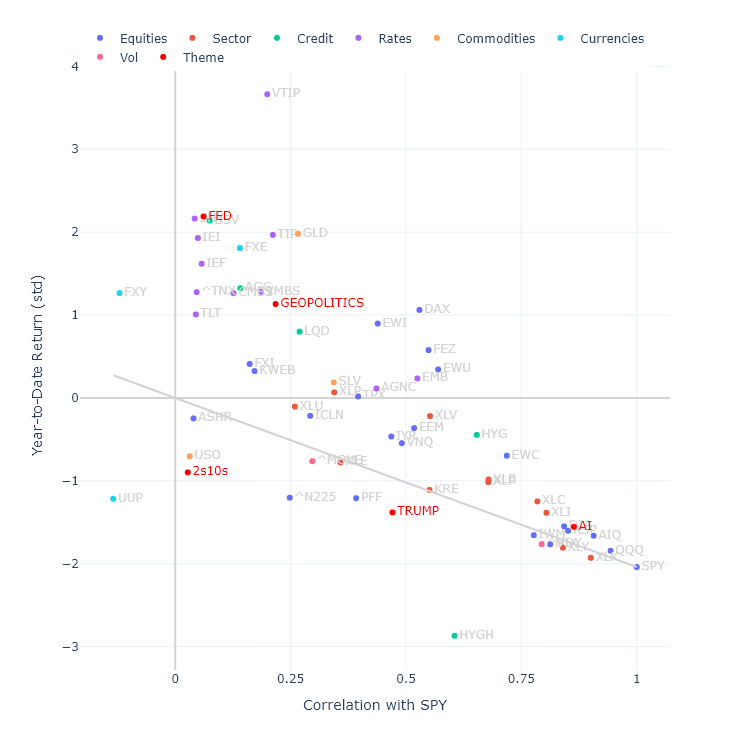

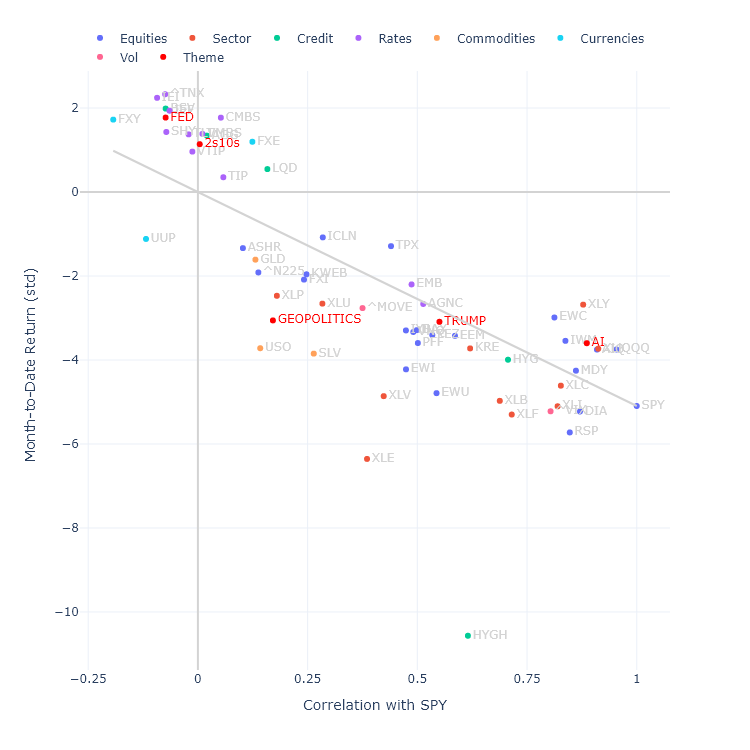

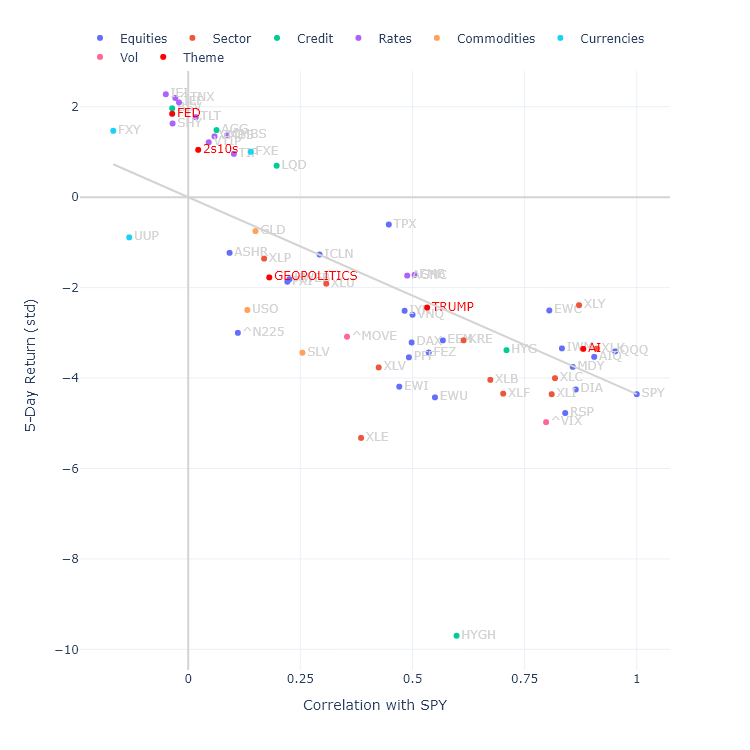

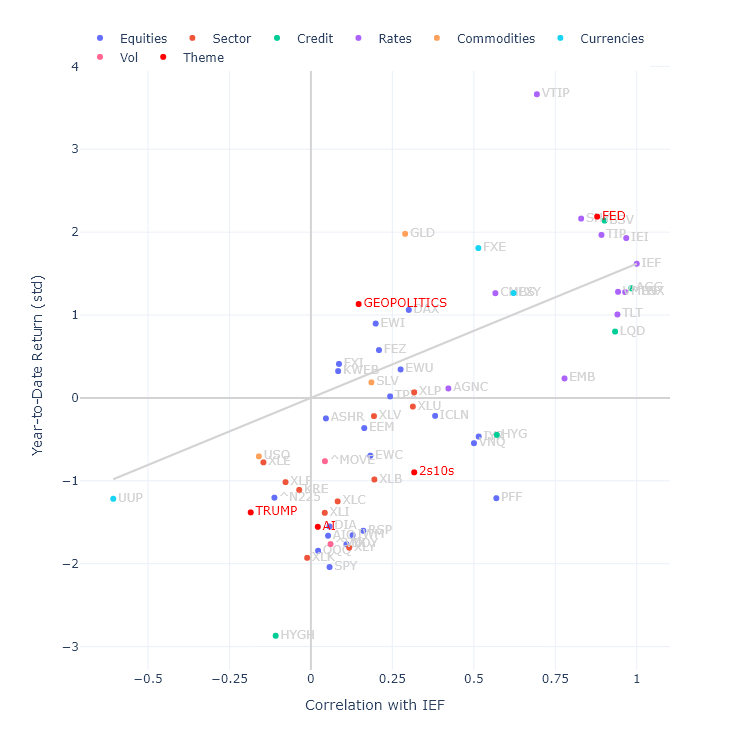

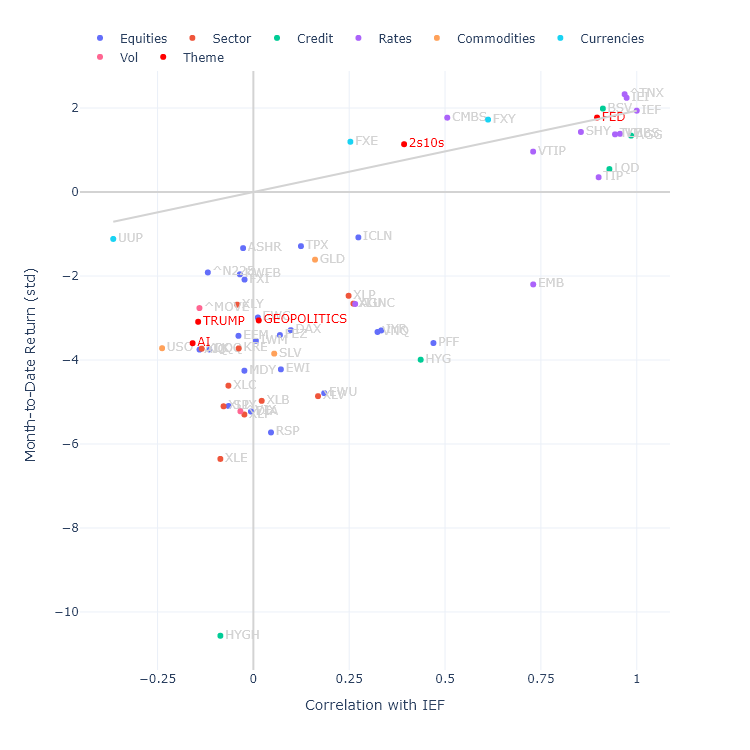

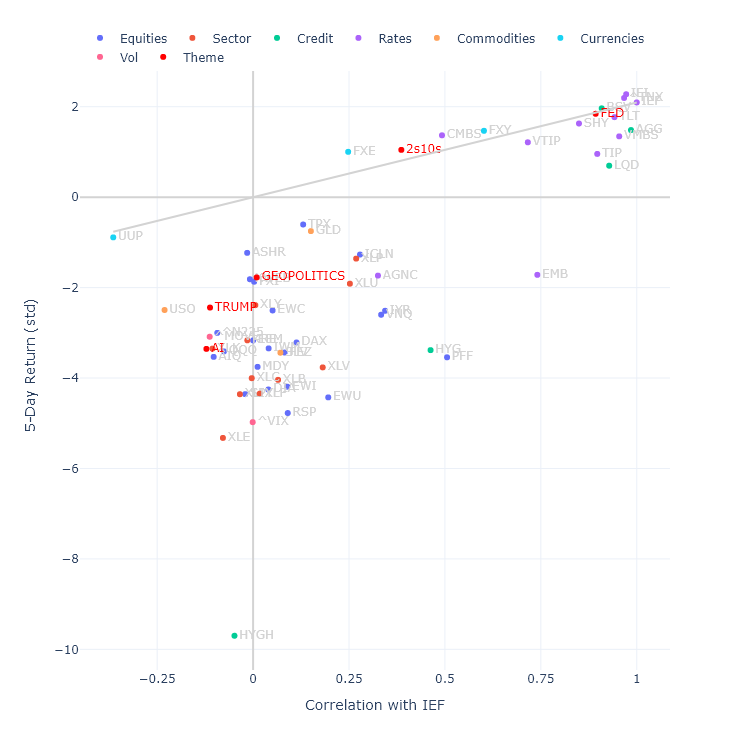

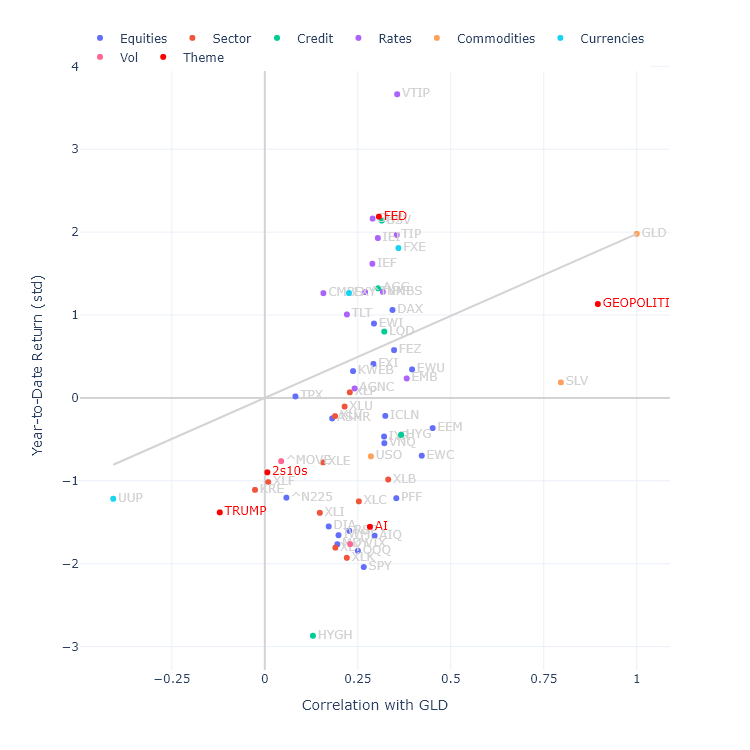

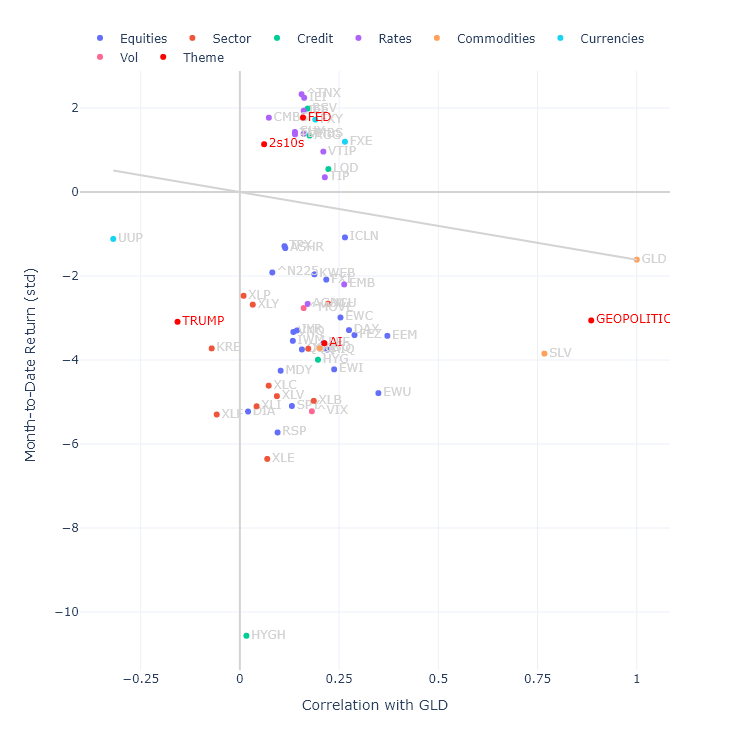

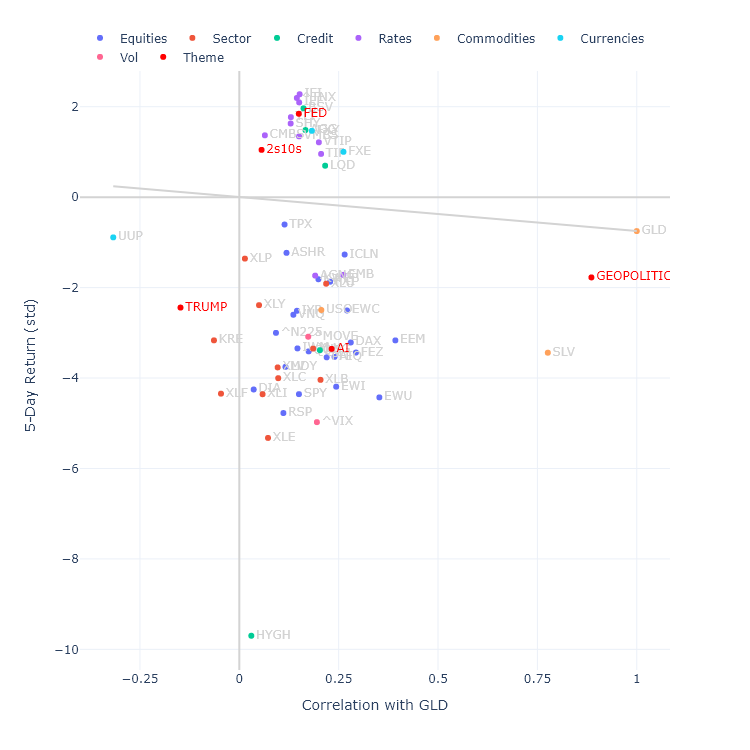

In [9]:
corr_asset_list = ['SPY', 'IEF', 'GLD']
vol_type  = 63
corr_type = 63
draw_market_feedback_scatter_set(factor_data, corr_asset_list, vol_type, corr_type)

# Correlation Matrix

In [10]:
def sort_assets(corr: pd.DataFrame, sorting_factor: str, factor_master: pd.DataFrame) -> pd.Index:
    df = (corr[[sorting_factor]]
          .join(factor_master[['asset_class', 'hyper_factor']])
          .assign(is_theme=lambda df: df['asset_class'] == 'Theme')
          .assign(is_sorting_factor=lambda df: df.index == sorting_factor)
          )
    sorted_index = df.sort_values(by=['is_sorting_factor', 'hyper_factor', 'is_theme', sorting_factor], 
                                  ascending=[False, False, True, False], key=abs).index
    return sorted_index


In [11]:
date_latest = factor_data.date.max().values
corr = factor_data.corr.sel(corr_type=corr_type, date=date_latest).to_pandas()

formatted_corr = format_corr_matrix(corr) #, factor_master['asset_class'])
formatted_corr



factor_name_1,SPY,IWM,MDY,RSP,QQQ,DIA,XLK,XLI,XLF,KRE,XLC,XLE,XLY,XLB,XLV,XLU,XLP,IYR,VNQ,AIQ,ICLN,PFF,FEZ,EWU,DAX,EWC,EWI,^N225,TPX,FXI,ASHR,KWEB,EEM,LQD,BSV,HYG,HYGH,AGG,^TNX,SHY,IEI,IEF,TLT,TIP,VTIP,AGNC,VMBS,CMBS,EMB,GLD,SLV,USO,UUP,FXE,FXY,^VIX,^MOVE,TRUMP,FED,AI,GEOPOLITICS,2s10s
factor_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SPY,1.00,0.87,0.90,0.92,0.96,0.92,0.93,0.90,0.84,0.71,0.89,0.67,0.89,0.82,0.58,0.47,0.35,0.63,0.65,0.93,0.34,0.64,0.67,0.67,0.63,0.86,0.65,0.26,0.52,0.36,0.20,0.37,0.70,0.15,-0.19,0.82,0.79,-0.06,-0.22,-0.16,-0.24,-0.18,-0.09,0.02,-0.07,0.58,-0.10,-0.07,0.58,0.28,0.49,0.43,-0.04,0.03,-0.27,0.87,0.45,0.65,-0.18,0.91,0.41,-0.05
IWM,0.87,1.00,0.97,0.89,0.80,0.87,0.78,0.88,0.80,0.86,0.74,0.65,0.83,0.80,0.50,0.40,0.24,0.64,0.66,0.81,0.34,0.67,0.57,0.58,0.54,0.80,0.55,0.28,0.58,0.31,0.18,0.33,0.61,0.20,-0.16,0.80,0.69,-0.01,-0.14,-0.15,-0.19,-0.13,-0.03,0.03,-0.10,0.55,-0.04,0.01,0.57,0.22,0.43,0.35,-0.04,0.05,-0.24,0.78,0.38,0.74,-0.16,0.74,0.34,0.04
MDY,0.90,0.97,1.00,0.95,0.82,0.91,0.80,0.93,0.85,0.84,0.77,0.71,0.84,0.86,0.54,0.46,0.30,0.69,0.72,0.83,0.33,0.67,0.61,0.62,0.58,0.83,0.59,0.28,0.61,0.32,0.18,0.33,0.63,0.18,-0.20,0.81,0.74,-0.04,-0.18,-0.19,-0.23,-0.16,-0.05,0.00,-0.14,0.56,-0.08,-0.04,0.56,0.22,0.44,0.40,-0.00,0.02,-0.28,0.80,0.38,0.74,-0.20,0.76,0.36,0.04
RSP,0.92,0.89,0.95,1.00,0.79,0.95,0.76,0.96,0.91,0.78,0.81,0.77,0.81,0.91,0.71,0.59,0.52,0.78,0.80,0.79,0.38,0.68,0.66,0.72,0.63,0.85,0.67,0.28,0.55,0.38,0.21,0.38,0.65,0.22,-0.14,0.83,0.81,0.02,-0.14,-0.12,-0.17,-0.11,-0.02,0.08,-0.04,0.64,-0.02,-0.05,0.60,0.26,0.45,0.41,-0.06,0.05,-0.19,0.80,0.38,0.69,-0.13,0.74,0.39,0.00
QQQ,0.96,0.80,0.82,0.79,1.00,0.81,0.97,0.79,0.69,0.60,0.87,0.55,0.87,0.70,0.43,0.35,0.19,0.49,0.50,0.97,0.34,0.56,0.65,0.60,0.60,0.79,0.59,0.23,0.48,0.35,0.20,0.37,0.70,0.10,-0.22,0.75,0.70,-0.09,-0.24,-0.19,-0.26,-0.20,-0.13,-0.03,-0.10,0.50,-0.13,-0.06,0.53,0.27,0.49,0.39,-0.06,0.06,-0.28,0.84,0.45,0.53,-0.21,0.97,0.39,-0.05
DIA,0.92,0.87,0.91,0.95,0.81,1.00,0.77,0.93,0.92,0.77,0.83,0.72,0.82,0.87,0.71,0.49,0.50,0.69,0.71,0.79,0.30,0.65,0.61,0.70,0.61,0.83,0.63,0.26,0.53,0.33,0.17,0.34,0.61,0.18,-0.13,0.80,0.78,-0.01,-0.17,-0.10,-0.18,-0.13,-0.05,0.09,0.00,0.57,-0.05,-0.07,0.57,0.21,0.41,0.40,-0.03,0.01,-0.24,0.80,0.40,0.73,-0.12,0.75,0.35,-0.06
XLK,0.93,0.78,0.80,0.76,0.97,0.77,1.00,0.76,0.63,0.58,0.79,0.54,0.79,0.67,0.37,0.33,0.11,0.45,0.46,0.95,0.33,0.52,0.63,0.56,0.58,0.76,0.56,0.22,0.45,0.34,0.20,0.35,0.70,0.07,-0.24,0.71,0.67,-0.12,-0.26,-0.21,-0.28,-0.23,-0.15,-0.07,-0.14,0.47,-0.15,-0.07,0.48,0.27,0.48,0.39,-0.04,0.04,-0.29,0.81,0.45,0.49,-0.23,0.96,0.39,-0.04
XLI,0.90,0.88,0.93,0.96,0.79,0.93,0.76,1.00,0.88,0.76,0.77,0.74,0.79,0.88,0.62,0.53,0.42,0.69,0.71,0.79,0.30,0.62,0.62,0.66,0.59,0.82,0.62,0.28,0.51,0.34,0.18,0.34,0.62,0.12,-0.20,0.77,0.79,-0.07,-0.22,-0.17,-0.25,-0.19,-0.10,0.01,-0.08,0.56,-0.11,-0.11,0.52,0.21,0.41,0.41,-0.00,-0.01,-0.24,0.78,0.39,0.71,-0.19,0.74,0.36,-0.04
XLF,0.84,0.80,0.85,0.91,0.69,0.92,0.63,0.88,1.00,0.82,0.76,0.70,0.74,0.80,0.63,0.52,0.48,0.66,0.68,0.67,0.20,0.63,0.53,0.66,0.54,0.76,0.59,0.30,0.47,0.25,0.11,0.26,0.50,0.13,-0.15,0.72,0.76,-0.04,-0.18,-0.13,-0.19,-0.14,-0.07,0.08,-0.00,0.53,-0.07,-0.07,0.49,0.16,0.35,0.36,0.05,-0.08,-0.25,0.74,0.37,0.80,-0.14,0.62,0.29,-0.03


In [52]:
corr_tradewar.rename_axis(columns='factor_name_1').stack().to_xarray()

<xarray.DataArray (factor_name: 46, factor_name_1: 46)> Size: 17kB
1.0 0.9077 0.9443 0.9708 0.92 0.9769 ... -0.07008 0.1034 -0.1725 0.2523 1.0
Coordinates:
  * factor_name    (factor_name) object 368B 'SPY' 'IWM' ... '^VIX' '^MOVE'
  * factor_name_1  (factor_name_1) object 368B 'SPY' 'IWM' ... '^VIX' '^MOVE'

In [56]:
# factor_data = get_factor_data(read_cache=False)
factor_data.date.max().values

np.datetime64('2025-04-07T00:00:00.000000000')

In [54]:
factor_data2 = factor_data.copy()
factor_data2.corr[1000] = corr_tradewar.rename_axis(columns='factor_name_1').stack().to_xarray()

IndexError: Index 1000 is out of bounds for axis 0 with size 5

In [25]:
factor_master = pd.DataFrame(factor_data.factor_name.attrs).T

date_t0 = factor_data.date.max().values
# date_t0 = factor_data.date[-2].values
date_t1  =factor_data.date[-63].values

corr_t0 = factor_data.corr.sel(corr_type=corr_type, date=date_t0).to_pandas()
corr_t1 = factor_data.corr.sel(corr_type=corr_type, date=date_t1).to_pandas()
corr_diff = corr_t0 - corr_t1
sorted_index = sort_assets(corr_t0, '2s10s', factor_master)
sorted_index_chg = sort_assets(corr_diff, '2s10s', factor_master)

format_corr_matrix(corr.loc[sorted_index, sorted_index])
format_corr_matrix(corr_diff.loc[sorted_index_chg, sorted_index_chg])

factor_name,2s10s,SPY,IEF,TRUMP,AI,FED,GEOPOLITICS,XLP,ICLN,XLV,EWU,DAX,EWI,^MOVE,XLC,EWC,UUP,TPX,KWEB,XLB,FEZ,HYGH,ASHR,AGNC,EEM,XLU,QQQ,VTIP,FXI,TIP,RSP,HYG,FXE,KRE,PFF,AIQ,VMBS,SHY,USO,DIA,IYR,BSV,XLE,XLI,LQD,XLY,IEI,TLT,XLK,AGG,VNQ,EMB,^VIX,^TNX,XLF,SLV,^N225,GLD,CMBS,IWM,FXY,MDY
factor_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2s10s,0.00,-0.07,0.01,0.07,-0.07,0.06,-0.04,-0.21,-0.16,-0.14,-0.14,-0.14,-0.13,-0.12,-0.11,-0.11,0.10,0.10,-0.09,-0.09,-0.08,-0.08,-0.08,-0.08,-0.08,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.06,0.06,-0.06,-0.06,0.06,0.06,-0.06,-0.06,-0.05,0.05,-0.05,-0.05,0.04,-0.04,0.04,0.04,-0.04,0.04,-0.04,-0.04,-0.03,0.03,-0.03,-0.03,-0.02,-0.02,0.01,-0.01,-0.01,-0.00
SPY,-0.07,0.00,-0.23,0.17,0.05,-0.23,0.22,0.01,0.06,0.02,0.10,0.10,0.21,0.14,0.11,0.14,0.11,0.12,0.20,0.15,0.12,0.18,0.16,0.14,0.17,0.20,0.02,-0.25,0.19,-0.17,0.06,0.17,-0.13,0.15,0.26,0.02,-0.28,-0.20,0.39,0.08,0.16,-0.26,0.32,0.09,-0.11,0.05,-0.28,-0.13,0.03,-0.19,0.15,0.06,0.07,-0.26,0.16,0.16,0.01,0.04,-0.18,0.09,-0.16,0.09
IEF,0.01,-0.23,0.00,-0.06,-0.25,0.02,-0.21,-0.11,-0.14,-0.13,-0.21,-0.29,-0.23,-0.23,-0.25,-0.25,0.20,-0.20,-0.15,-0.29,-0.23,-0.09,-0.10,-0.22,-0.27,-0.13,-0.22,-0.00,-0.14,-0.01,-0.26,-0.35,-0.21,-0.14,-0.27,-0.27,0.01,0.03,-0.14,-0.18,-0.31,0.01,-0.05,-0.23,-0.04,-0.26,0.00,-0.02,-0.21,-0.00,-0.31,-0.18,-0.20,-0.00,-0.06,-0.26,-0.07,-0.17,-0.04,-0.25,0.02,-0.27
TRUMP,0.07,0.17,-0.06,0.00,0.26,-0.12,0.28,0.12,0.15,0.11,0.20,0.21,0.24,0.09,0.20,0.22,0.10,0.23,0.19,0.20,0.26,0.11,0.15,0.17,0.28,0.12,0.21,-0.22,0.20,-0.03,0.11,0.25,-0.09,0.03,0.35,0.20,-0.07,-0.11,0.40,0.07,0.27,-0.12,0.17,0.04,0.08,0.22,-0.11,0.06,0.23,-0.01,0.27,0.17,0.15,-0.10,-0.02,0.26,0.03,0.10,-0.08,0.07,-0.15,0.10
AI,-0.07,0.05,-0.25,0.26,0.00,-0.25,0.18,0.03,0.09,0.06,0.13,0.12,0.22,0.22,0.14,0.21,0.05,0.14,0.16,0.21,0.11,0.25,0.09,0.18,0.15,0.30,0.02,-0.24,0.13,-0.21,0.16,0.21,-0.06,0.26,0.28,0.01,-0.28,-0.22,0.29,0.18,0.21,-0.27,0.37,0.19,-0.14,0.06,-0.29,-0.17,0.02,-0.22,0.20,0.08,0.16,-0.25,0.28,0.14,0.04,0.06,-0.10,0.22,-0.15,0.20
FED,0.06,-0.23,0.02,-0.12,-0.25,0.00,-0.22,-0.03,-0.06,-0.08,-0.17,-0.24,-0.18,-0.19,-0.23,-0.23,0.15,-0.26,-0.14,-0.29,-0.21,-0.09,-0.09,-0.20,-0.27,-0.11,-0.22,0.02,-0.13,0.04,-0.26,-0.35,-0.17,-0.19,-0.25,-0.28,0.01,-0.00,-0.15,-0.19,-0.30,-0.00,-0.06,-0.24,-0.04,-0.27,0.00,-0.01,-0.22,0.00,-0.31,-0.18,-0.21,0.02,-0.07,-0.27,-0.06,-0.18,-0.04,-0.27,0.04,-0.30
GEOPOLITICS,-0.04,0.22,-0.21,0.28,0.18,-0.22,0.00,0.04,-0.02,0.20,0.10,0.08,0.14,0.25,0.16,0.03,0.14,0.19,0.04,0.17,0.08,0.28,-0.00,0.13,0.05,0.21,0.19,-0.21,0.01,-0.15,0.24,0.12,-0.15,0.24,0.04,0.18,-0.22,-0.19,0.04,0.24,0.12,-0.24,0.13,0.25,-0.09,0.18,-0.25,-0.13,0.21,-0.17,0.11,0.05,0.22,-0.23,0.32,0.01,0.04,-0.01,-0.15,0.18,-0.17,0.21
XLP,-0.21,0.01,-0.11,0.12,0.03,-0.03,0.04,0.00,-0.02,0.13,0.12,0.02,0.10,-0.04,0.06,0.02,0.06,0.02,0.21,0.06,0.04,0.13,0.11,0.06,0.10,0.03,0.01,0.13,0.18,0.04,0.04,-0.00,-0.11,0.05,-0.04,0.01,-0.11,0.02,0.18,0.07,0.00,-0.06,0.20,0.10,-0.11,-0.04,-0.09,-0.14,-0.01,-0.10,-0.00,-0.01,-0.07,-0.17,0.17,-0.03,0.00,-0.06,-0.20,-0.03,-0.05,-0.01
ICLN,-0.16,0.06,-0.14,0.15,0.09,-0.06,-0.02,-0.02,0.00,0.04,-0.01,-0.02,0.06,0.08,0.09,0.02,-0.05,-0.11,0.06,-0.00,0.00,0.13,0.04,0.02,0.03,0.07,0.09,0.04,0.06,-0.09,0.02,-0.02,0.02,0.06,-0.04,0.06,-0.12,-0.04,-0.01,0.11,-0.07,-0.08,0.13,0.11,-0.11,0.00,-0.12,-0.18,0.07,-0.12,-0.08,0.01,0.09,-0.15,0.19,0.01,0.06,-0.01,-0.15,0.04,0.01,0.01


# Trade war

In [17]:
corr_type

63

In [44]:
corr_type

63

In [65]:
def get_tradewar_corr(ret: xr.DataArray) -> xr.DataArray:
    df = ret.to_pandas()
    mask = df.index.year.isin([2008])
    return df.loc[mask].dropna(axis=1, how='any').corr()

corr_tradewar = get_tradewar_corr(factor_data.ret)
sorted_index = sort_assets(corr_tradewar, 'SPY', factor_master)

# corr_ewm = corr_t0.loc[corr_tradewar.index, corr_tradewar.columns]
corr_ewm = corr_t0

corr_diff = corr_ewm.loc[sorted_index, sorted_index] - corr_tradewar.loc[sorted_index, sorted_index]

format_corr_matrix(corr_tradewar.loc[sorted_index, sorted_index])

# format_corr_matrix(corr_ewm.loc[sorted_index, sorted_index])
# format_corr_matrix(corr_diff)

factor_name,SPY,IEF,DIA,RSP,MDY,XLK,QQQ,EWU,XLI,FEZ,IWM,EEM,EWI,XLY,XLB,XLE,FXI,XLV,XLF,XLU,^VIX,XLP,IYR,EWC,VNQ,KRE,FXY,PFF,HYG,TPX,IEI,SHY,TLT,USO,^TNX,BSV,LQD,FXE,SLV,TIP,^MOVE,EMB,^N225,UUP,AGG,GLD
factor_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SPY,1.00,-0.47,0.98,0.97,0.95,0.93,0.92,0.92,0.91,0.91,0.91,0.91,0.89,0.86,0.85,0.84,0.84,0.84,0.84,0.84,0.83,0.83,0.81,0.81,0.80,0.77,-0.65,0.61,0.57,0.54,-0.53,-0.51,-0.48,0.40,-0.38,-0.31,0.27,0.25,0.24,-0.21,0.21,0.18,0.17,-0.11,0.03,-0.00
IEF,-0.47,1.00,-0.45,-0.48,-0.47,-0.46,-0.48,-0.42,-0.43,-0.39,-0.51,-0.49,-0.40,-0.43,-0.40,-0.41,-0.50,-0.32,-0.49,-0.37,-0.48,-0.38,-0.45,-0.40,-0.45,-0.42,0.62,-0.33,-0.21,-0.33,0.90,0.77,0.91,-0.25,0.91,0.41,0.07,0.07,-0.04,0.67,-0.16,0.00,-0.02,-0.15,0.43,0.08
DIA,0.98,-0.45,1.00,0.95,0.91,0.93,0.90,0.90,0.91,0.90,0.88,0.90,0.87,0.85,0.81,0.81,0.84,0.83,0.81,0.84,0.80,0.83,0.80,0.77,0.78,0.76,-0.65,0.55,0.53,0.53,-0.49,-0.48,-0.45,0.35,-0.33,-0.28,0.23,0.23,0.20,-0.21,0.17,0.13,0.16,-0.09,0.01,-0.00
RSP,0.97,-0.48,0.95,1.00,0.95,0.92,0.93,0.88,0.92,0.88,0.94,0.89,0.85,0.90,0.84,0.79,0.83,0.81,0.88,0.79,0.82,0.81,0.86,0.79,0.85,0.82,-0.65,0.62,0.53,0.58,-0.52,-0.51,-0.48,0.36,-0.39,-0.30,0.20,0.20,0.20,-0.23,0.20,0.20,0.16,-0.07,-0.01,0.00
MDY,0.95,-0.47,0.91,0.95,1.00,0.87,0.90,0.87,0.89,0.85,0.96,0.88,0.83,0.86,0.86,0.80,0.82,0.80,0.83,0.77,0.78,0.78,0.86,0.78,0.86,0.78,-0.62,0.58,0.50,0.58,-0.52,-0.48,-0.49,0.38,-0.38,-0.28,0.19,0.22,0.21,-0.24,0.19,0.17,0.09,-0.10,-0.06,-0.01
XLK,0.93,-0.46,0.93,0.92,0.87,1.00,0.94,0.87,0.86,0.86,0.86,0.88,0.83,0.82,0.78,0.75,0.82,0.74,0.78,0.77,0.78,0.80,0.78,0.73,0.78,0.71,-0.66,0.51,0.48,0.51,-0.51,-0.51,-0.44,0.35,-0.37,-0.32,0.21,0.22,0.14,-0.28,0.14,0.10,0.10,-0.08,-0.05,-0.04
QQQ,0.92,-0.48,0.90,0.93,0.90,0.94,1.00,0.85,0.86,0.86,0.89,0.88,0.83,0.83,0.81,0.75,0.82,0.77,0.78,0.73,0.78,0.76,0.80,0.75,0.79,0.71,-0.64,0.54,0.49,0.53,-0.54,-0.51,-0.47,0.33,-0.39,-0.33,0.20,0.19,0.15,-0.28,0.18,0.13,0.08,-0.05,-0.03,-0.06
EWU,0.92,-0.42,0.90,0.88,0.87,0.87,0.85,1.00,0.85,0.93,0.81,0.89,0.90,0.76,0.85,0.84,0.80,0.76,0.72,0.79,0.76,0.73,0.73,0.82,0.71,0.65,-0.63,0.56,0.54,0.48,-0.48,-0.44,-0.46,0.49,-0.38,-0.28,0.29,0.38,0.32,-0.18,0.23,0.13,0.20,-0.25,0.06,0.12
XLI,0.91,-0.43,0.91,0.92,0.89,0.86,0.86,0.85,1.00,0.85,0.86,0.84,0.82,0.84,0.85,0.76,0.76,0.78,0.79,0.72,0.78,0.76,0.80,0.75,0.78,0.74,-0.60,0.53,0.48,0.53,-0.49,-0.47,-0.42,0.32,-0.36,-0.23,0.15,0.22,0.26,-0.21,0.20,0.21,0.18,-0.10,0.02,0.05


# Draw correlation time series

In [ ]:
asset1 = 'SPY'
asset2 = 'IEF'
start_date = '2020'
start_date = None


df1  = factor_data.sel(factor_name=asset1, factor_name_1=asset2, date=slice('2024', None)).corr.to_pandas().T.stack()

from chart import draw_correlation, draw_volatility

fig1 = draw_correlation(factor_data.corr.sel(date=slice(start_date, None)), asset1, asset2, [21, 63, 126, 252])
fig1.show(renderer='png')

fig2 = draw_volatility(factor_data.vol.sel(date=slice(start_date, None)), asset1, [21, 63, 126, 252])
fig3 = draw_volatility(factor_data.vol.sel(date=slice(start_date, None)), asset2, [21, 63, 126, 252])

fig2.show()
fig3.show()

fig1.show(renderer='png')
# px_write(fig1, 'corr_ts.html')
# px_write(fig1, 'corr_ts.png')


In [ ]:
start_date = '2015'
start_date = None

corr_pairs = [('SPY', 'IEF'),
            #   ('SHY', 'IEF'), 
            #   ('2s10s', 'SPY'), 
            #   ('2s10s', 'IEF'), 
              ('2s10s', 'HYGH'), 
            #   ('2s10s', 'HYG'), 
            #   ('2s10s', 'LQD'), 
            #   ('2s10s', 'LQDH'), 
            #   ('2s10s', 'VMBS'), 
            #   ('2s10s', 'AGNC')
              ]

for asset1, asset2 in corr_pairs:
    fig = draw_correlation(factor_data.corr.sel(date=slice(start_date, None)), asset1, asset2, [21, 63, 126, 252])
    fig.show(renderer='png')
    # px_write(fig, f'corr_{asset1}_{asset2}.html')
    # px_write(fig, f'corr_{asset1}_{asset2}.png')

In [ ]:
px_write(fig1, 'corr_ts.html')
px_write(fig1, 'corr_ts.png')
px_write(fig, 'fed_feedback.html')
px_write(fig, 'fed_feedback.png')

In [ ]:
# factor_data.ret.sel(factor_name=[asset1, asset2]).plot(hue='asset')
factor_data.ret.sel(factor_name='IWM').plot()
factor_data.ret.sel(factor_name='IEF').plot()
factor_data.ret.sel(factor_name='SHY').plot()

factor_data.ret.sel(factor_name='2s10s').plot()

In [ ]:
factor_data